## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Read CSV and apply filtering

In [2]:
data = pd.read_csv("fatalities.csv")

##### Filter data which is only from palestine or israel

In [15]:

data = data[(data['citizenship']  == 'Palestinian') | (data['citizenship'] == 'Israeli')]

# Data Analysis and Cleansing

### Exploratory data analysis

Get start elements of data

In [3]:
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,9/24/2023,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,9/24/2023,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,9/22/2023,16.0,Palestinian,Kfar Dan,Jenin,West Bank,9/22/2023,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,9/20/2023,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,9/20/2023,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,9/19/2023,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,9/19/2023,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


Get last elements of data

In [12]:
data.tail()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
11119,Binyamin Herling,2000-10-19,64,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,Unknown,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,Unknown,Israeli civilians,Killed by settlers who rioted in Biddya village.
11123,Wichlav Zalsevsky,2000-10-02,24,Israeli,Masha,Salfit,West Bank,2000-10-02,M,Israelis,Ashdod,Israel,gunfire,live ammunition,Palestinian civilians,


##### Get info of data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

Check how many null values avilable in data in each column

In [11]:
data.isna().sum()

name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                             0
took_part_in_the_hostilities    1428
place_of_residence                 0
place_of_residence_district        0
type_of_injury                     0
ammunition                         0
killed_by                          0
notes                              0
dtype: int64

Check number of duplicates in data

In [5]:
data.duplicated().sum()

7

### Data cleaning

Let's get rid of duplicate entries

In [6]:
data.drop_duplicates(keep='first',inplace=True)

##### Fill null values

In [7]:
data['age'].fillna(data['age'].median(), inplace=True)
data['gender'].fillna(data['gender'].mode()[0],inplace=True)
data['place_of_residence'].fillna(data['place_of_residence'].mode()[0],inplace=True)
data['place_of_residence_district'].fillna(data['place_of_residence_district'].mode()[0], inplace=True)
data['citizenship'].fillna(data['citizenship'].mode()[0], inplace=True)
data['type_of_injury'].fillna('Unknown',inplace=True)
data['took_part_in_the_hostilities'].fillna(data['took_part_in_the_hostilities'].mode()[0], inplace=True)
data['ammunition'].fillna('Unknown',inplace=True)
data['notes'].fillna('',inplace=True)

Convert columns of data to correct format for better data analysis

In [8]:
data['date_of_event'] = data['date_of_event'].astype('datetime64[ns]')
data['date_of_death'] = data['date_of_death'].astype('datetime64[ns]')
data['age'] = data['age'].astype(int)
data['gender'] = data['gender'].astype(str)
data['place_of_residence'] = data['place_of_residence'].astype(str)
data['place_of_residence_district'] = data['place_of_residence_district'].astype(str)
data['type_of_injury'] = data['type_of_injury'].astype(str)
data['took_part_in_the_hostilities'] = data['took_part_in_the_hostilities'].astype(str)
data['ammunition'] = data['ammunition'].astype(str)
data['notes'] = data['notes'].astype(str)

Get description of data and some important statistical measures

In [9]:
data.describe()

,date_of_event,age,date_of_death
count,11117,11117.000000,11117
mean,2009-11-01 19:17:37.299631104,26.704597,2009-11-04 18:27:06.266078976
min,2000-10-02 00:00:00,1.000000,2000-10-02 00:00:00
25%,2004-05-18 00:00:00,19.000000,2004-05-19 00:00:00
50%,2008-12-29 00:00:00,23.000000,2008-12-30 00:00:00
75%,2014-07-26 00:00:00,31.000000,2014-07-26 00:00:00
max,2023-09-24 00:00:00,112.000000,2023-09-24 00:00:00
std,NaN,13.710272,NaN


### Sns styles

Set figure size to some default value

In [10]:
sns.set(rc={'figure.figsize':(16, 7)})

Set Color palette, axes and grid color

In [11]:
sns.set(palette='pastel')
sns.set_style({"axes.facecolor": "#dcdcdc", "grid.color": "#f5f5f5"})

# Q-1

##### Explore the dataset and identify the trends in fatalities over time.
##### Identify any significant changes, spikes, or declines in the number of fatalities

<b>Fatalities trend over time</b>

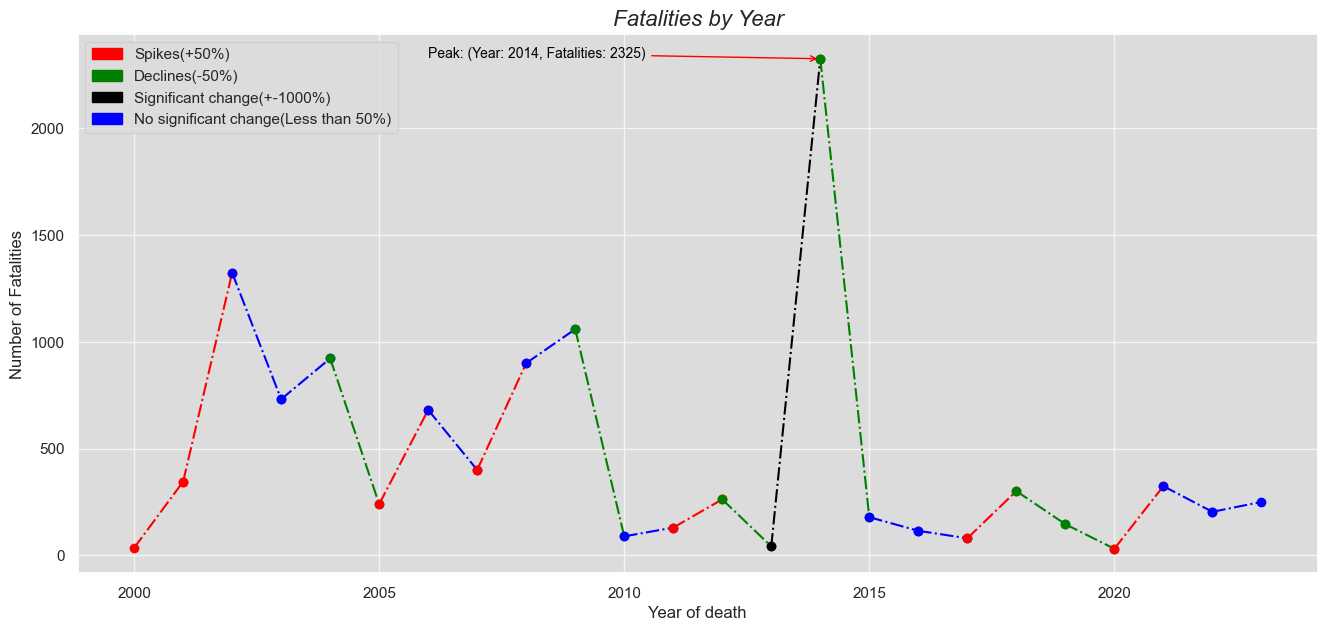

In [55]:
# Get counts of deaths based on year and find percentage change of current and previous data points
fatalities_count_by_year = data["date_of_death"].dt.year.value_counts().sort_index()
percentage_change_based_on_previous = fatalities_count_by_year.pct_change()

# Threshhold variables and array for graph lines and colours
spike_threshhold = 0.5
decline_threshhold = -0.5
significant_change_threshhold_spike = 10
significant_change_threshhold_decline = -significant_change_threshhold_spike
lines_and_its_colours = []

# Add lines and their colours in array based on threshhold
for i in range(1, len(percentage_change_based_on_previous)):
    if percentage_change_based_on_previous.iloc[i] >= significant_change_threshhold_spike or \
          percentage_change_based_on_previous.iloc[i] <= significant_change_threshhold_decline:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'black'))
    elif percentage_change_based_on_previous.iloc[i] >= spike_threshhold:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'red'))
    elif percentage_change_based_on_previous.iloc[i] <= decline_threshhold:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'green'))
    else:
        lines_and_its_colours.append((fatalities_count_by_year.index[i - 1], 'blue'))

# Change figure size and add lines to graph
for i in range(0, len(lines_and_its_colours)):
    line_start_year, line_color = lines_and_its_colours[i]
    line_end_year = line_start_year + 1
    start_value, end_value = fatalities_count_by_year.loc[line_start_year], fatalities_count_by_year.iloc[i + 1]
    plt.plot([line_start_year, line_end_year], [start_value, end_value], color=line_color, marker='o', linestyle='-.')

# Get the peak point and add arrow to it. Add labels and titles
peak_y = fatalities_count_by_year.values[np.argmax(fatalities_count_by_year.values)]
peak_x = fatalities_count_by_year.index[np.argmax(fatalities_count_by_year.values)]

plt.annotate(f'Peak: (Year: {peak_x}, Fatalities: {peak_y})', xy=(peak_x, peak_y), xytext=(peak_x - 8, peak_y + 5),
              arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='black')

plt.xlabel('Year of death', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.title('Fatalities by Year', fontsize=16, fontstyle='italic')

# Add grid lines to graph and also patches to the legend and then show the graph
plt.grid(True)
redPatch = mpatches.Patch(color='red', label=f'Spikes(+{int(spike_threshhold * 100)}%)')
greenPatch = mpatches.Patch(color='green', label=f'Declines({int(decline_threshhold * 100)}%)')
blackPatch = mpatches.Patch(color='black', label=f'Significant change(+-{int(significant_change_threshhold_spike * 100)}%)')
bluePatch = mpatches.Patch(color='blue', label=f'No significant change(Less than {int(spike_threshhold * 100)}%)')
plt.legend(handles=[redPatch, greenPatch, blackPatch, bluePatch], loc='upper left')
plt.show()

As shown in graph, We have spikes on years with red color and decline with green colour. Blue color shows less than 50% decline or spike according to previous data point. Black color shows huge spike or decline which is10X with respect to previous data point.

This shows that we have spikes in year of 2001, 2002, 2006, 2008, 2012, 2018, 2021 where increase in fatalities is 50% greater than previous year.
We have declines in year of 2005, 2010, 2013, 2015, 2019, 2020 where decline in fatalities is 50% greater than previous year.

We have less than 50% change(w.r.t previous year) in fatalities in year of 2003, 2004, 2007, 2009, 2011, 2016, 2017, 2022, 2023.

We have more than 10X change in year of <b>2014</b> w.r.t 2013. It is peak value with <b>2325</b> fatalities.

<b>Number of fatalities comparison by citizenship year wise</b>

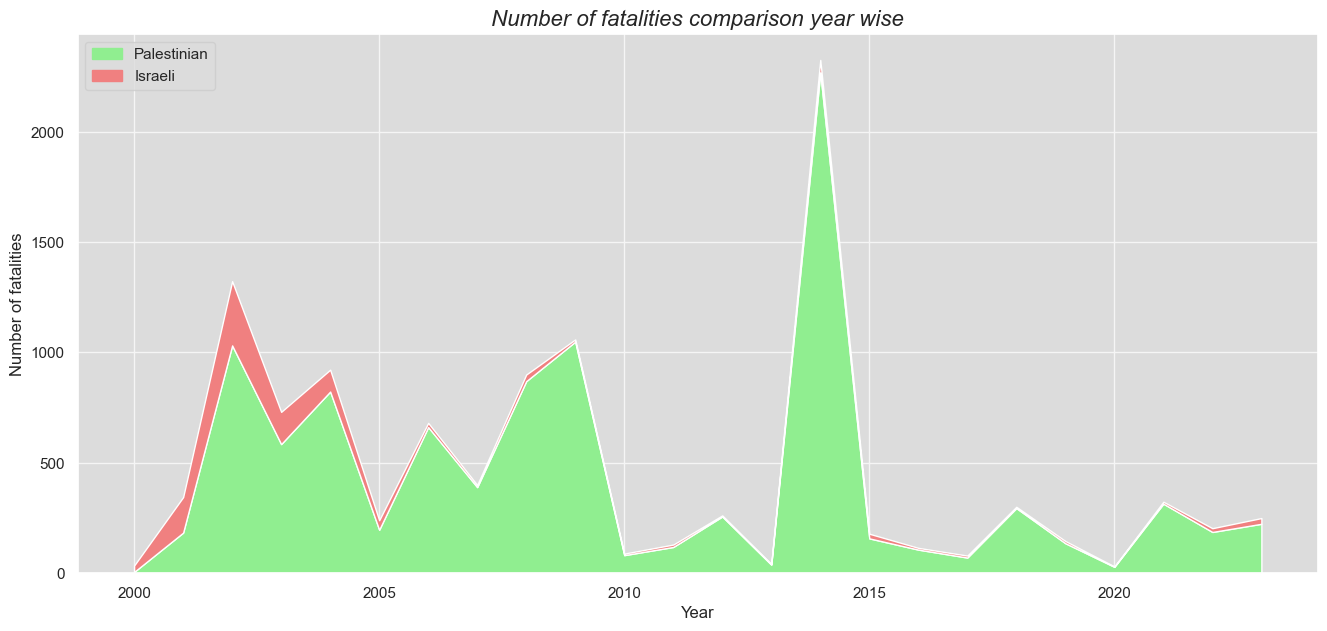

In [46]:
comparisonData = data.groupby([data["date_of_death"].dt.year, "citizenship"])["citizenship"].count()
unstackedComparisonData = comparisonData.unstack()
unstackedComparisonData['Israeli']
unstackedComparisonData['Palestinian']
unstackedComparisonData.index
plt.stackplot(unstackedComparisonData.index, unstackedComparisonData['Palestinian'],
              unstackedComparisonData['Israeli'], colors =['lightgreen', 'lightcoral'])
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of fatalities',fontsize=12)
plt.title('Number of fatalities comparison year wise',fontsize=16, fontstyle='italic')
PalestinianPatch = mpatches.Patch(color='lightgreen', label='Palestinian')
IsraeliPatch = mpatches.Patch(color='lightcoral', label='Israeli')
plt.legend(handles=[PalestinianPatch, IsraeliPatch], loc='upper left')

Here in above image we can see that palestine fatalities over time is very large and dense as compared to israel fatalities over time. This can be more clear in the below image where we compare each year fatalities citizenship wise using bar plot.

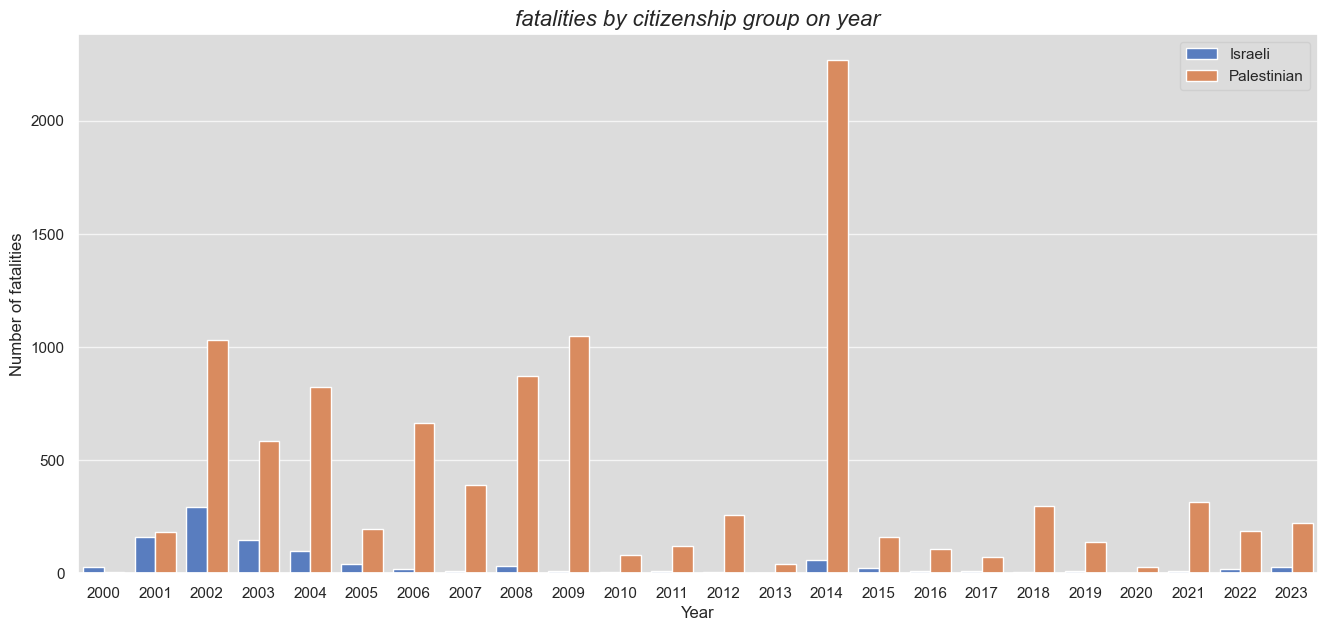

In [47]:
sns.countplot(x=data['date_of_death'].dt.year, hue=data['citizenship'], palette='muted')
plt.legend(loc='upper right')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of fatalities',fontsize=12)
plt.title('fatalities by citizenship group on year', fontsize = 16, fontstyle='italic')
plt.show()

As the above image showing that Israel have very less fatalities over time. This also shows that in <b>2014</b> there is huge increase in fatalities where palestine fatalities are very high while israel fatalities are very low. Also in other years like in 2009 there are huge palestine fatalities while israel have near to no fatality. Also in other years israel fatalities are minor which shows israel brutality over the palestinian people.

# Q-2

##### Conduct an analysis by examining the age, gender, and citizenship of the individuals killed. 
##### Determine if there are any notable patterns or disparities in the data.

Analysis By Age(Age Groups)

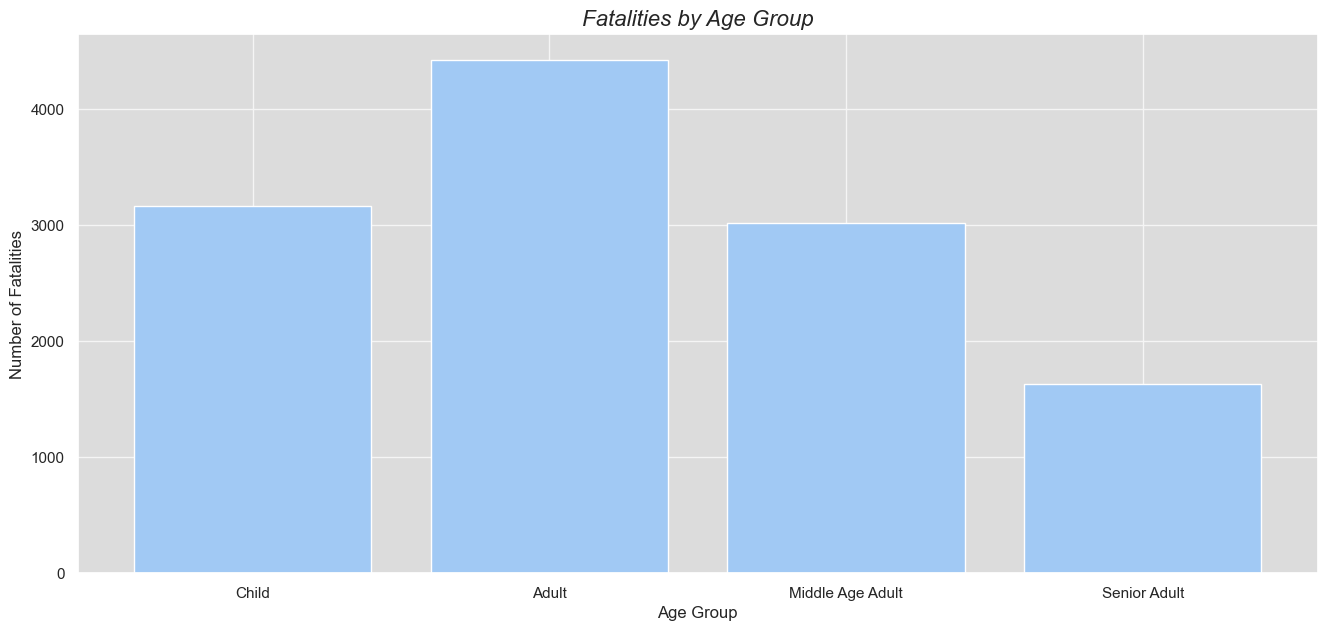

In [36]:
# Get count of deaths based on age of victim
age_value_counts_sotred = data['age'].value_counts().sort_index()

# Bar chart based on age groups
# Age groups based on age
child = age_value_counts_sotred.loc[0:19].sum()
adult = age_value_counts_sotred.loc[19:26].sum()
middleAgeAdult = age_value_counts_sotred.loc[26:41].sum()
seniorAdult = age_value_counts_sotred.loc[40:].sum()

# plt.figure(figsize=(16, 7))
plt.bar(['Child', 'Adult', 'Middle Age Adult', 'Senior Adult'],
        [child, adult, middleAgeAdult, seniorAdult])
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Fatalities by Age Group',fontsize=16,fontstyle='italic')
plt.show()

It is clear in this image that there are more number of fatalities in adult category then it's child who was victim and senior adult are very less than other categories.

<b>Analysis By Gender</b>

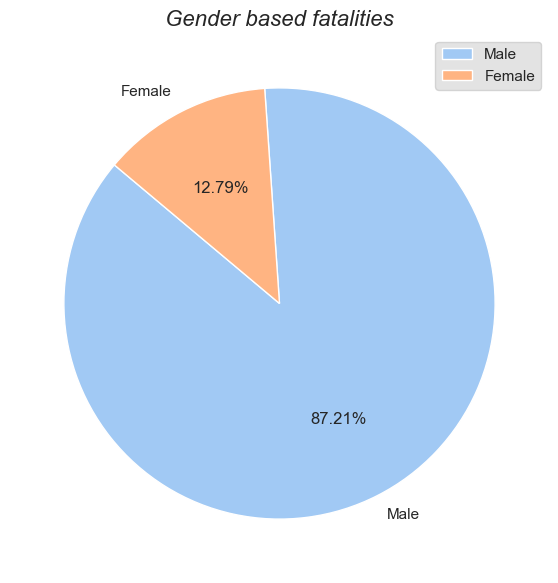

In [94]:
# Pie chart based on gender
gender_value_counts = data['gender'].value_counts()
# plt.figure(figsize=(7, 7))
plt.pie(gender_value_counts, labels=gender_value_counts.index.map(lambda value: 'Male' if value=='M' 
                                                                  else 'Female' if value=='F' else value), autopct='%.2f%%', startangle=140)
plt.title('Gender based fatalities',fontsize=16,fontstyle='italic')
plt.legend()
plt.show()

This graph shows that there are males who are more killed with 87.21% fatalities percentage while females percentage is 12.79% which is 7X less than males.

<b>Analysis By Citizenship</b>

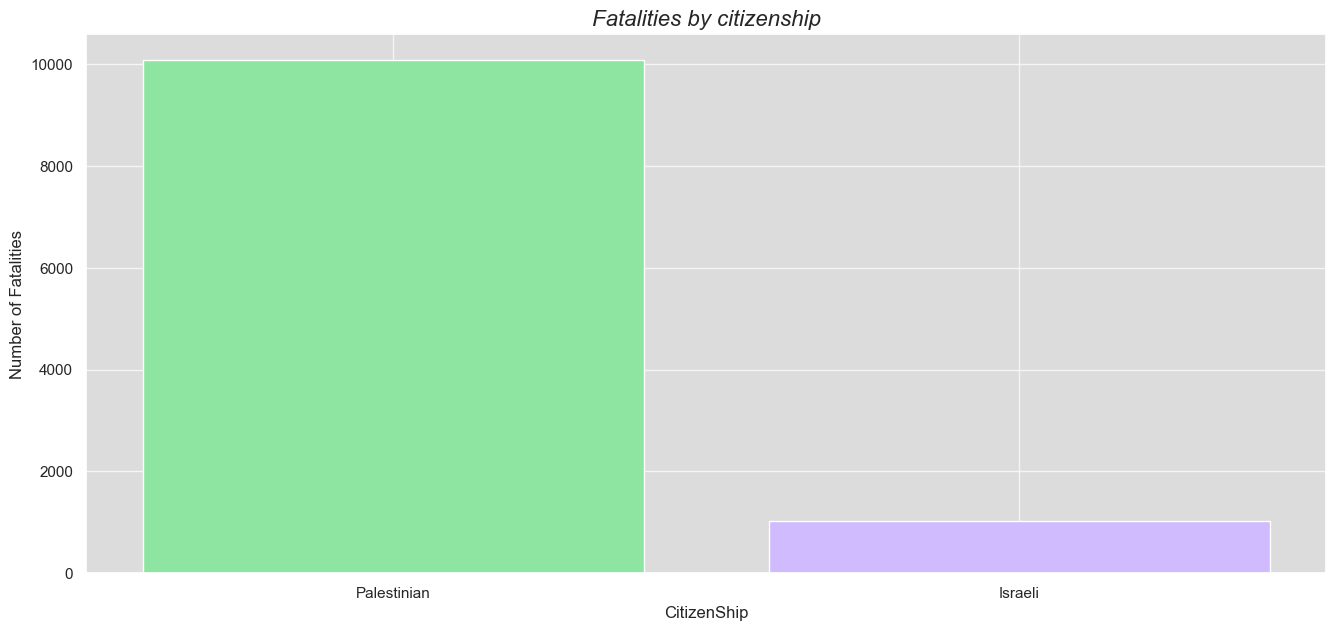

In [64]:
# Bar plot based on citizendhip
citizenship_value_counts = data['citizenship'].value_counts()
# plt.figure(figsize=(16, 7))s
plt.bar(citizenship_value_counts.index, citizenship_value_counts.values, color=['g', 'm'])
plt.xlabel('CitizenShip', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Fatalities by citizenship',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

If we make comparison based on citizenship it is clear that palestine fatalities are much greater as compared to israel fatalities.

<b>Analysis By Age(Age Groups) and Gender</b>

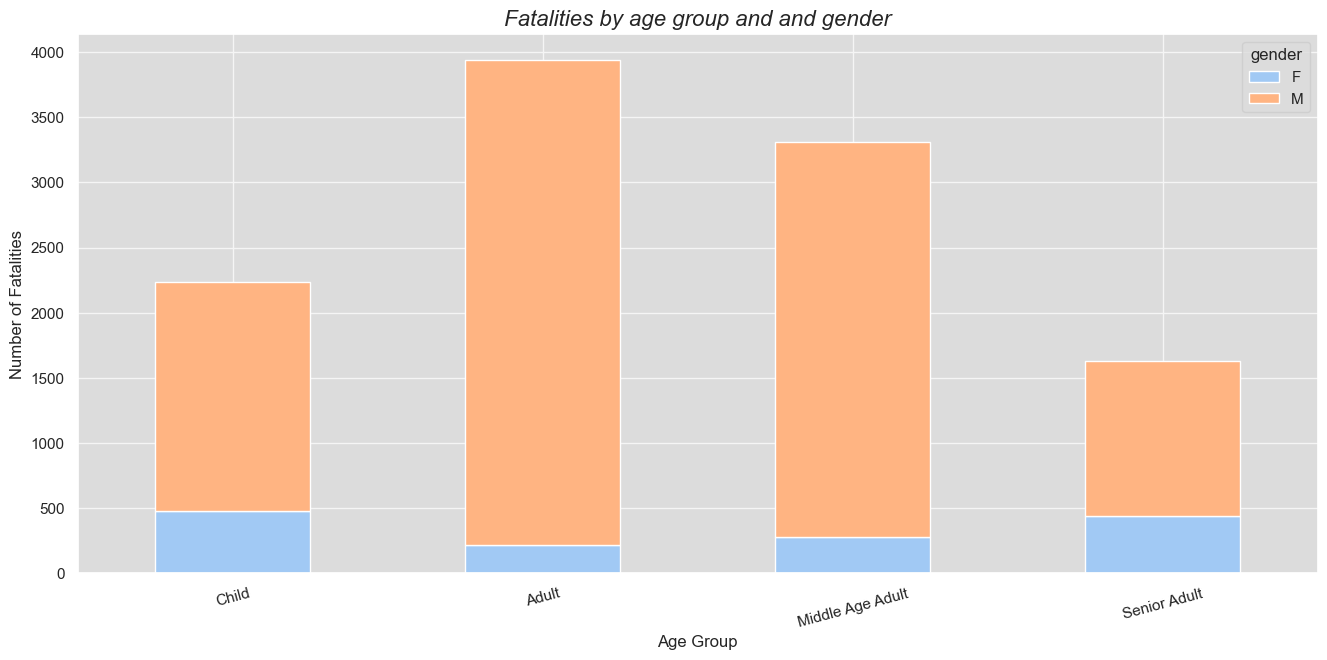

In [65]:
# Stacked plots
df = pd.DataFrame(data) # Copy data in df to avoid manipulation in real data
# Age bins and groups distribution
age_bins = [0, 18, 25, 40, 120]
age_labels = ['Child', 'Adult', "Middle Age Adult", 'Senior Adult']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Stack bar plot between age group and gender
pivot_df = df.pivot_table(index='age_group'
                          , columns='gender', values='age', aggfunc='count')
pivot_df.plot(kind='bar', stacked=True)

plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Fatalities by age group and and gender',fontsize=16,fontstyle='italic')
plt.xticks(rotation=15)
plt.show()

If we compare fatalities based on age group and gender, we can see that male adults fatalities are maximum overall.<br>
* Females fatalities are maximum in child age category while minimum in adult age category.<br>
* Male fatalities are maximum in adult age category while minimum in senior adult.

<b>Analysis By Age(Age Groups) and Citizenship</b>

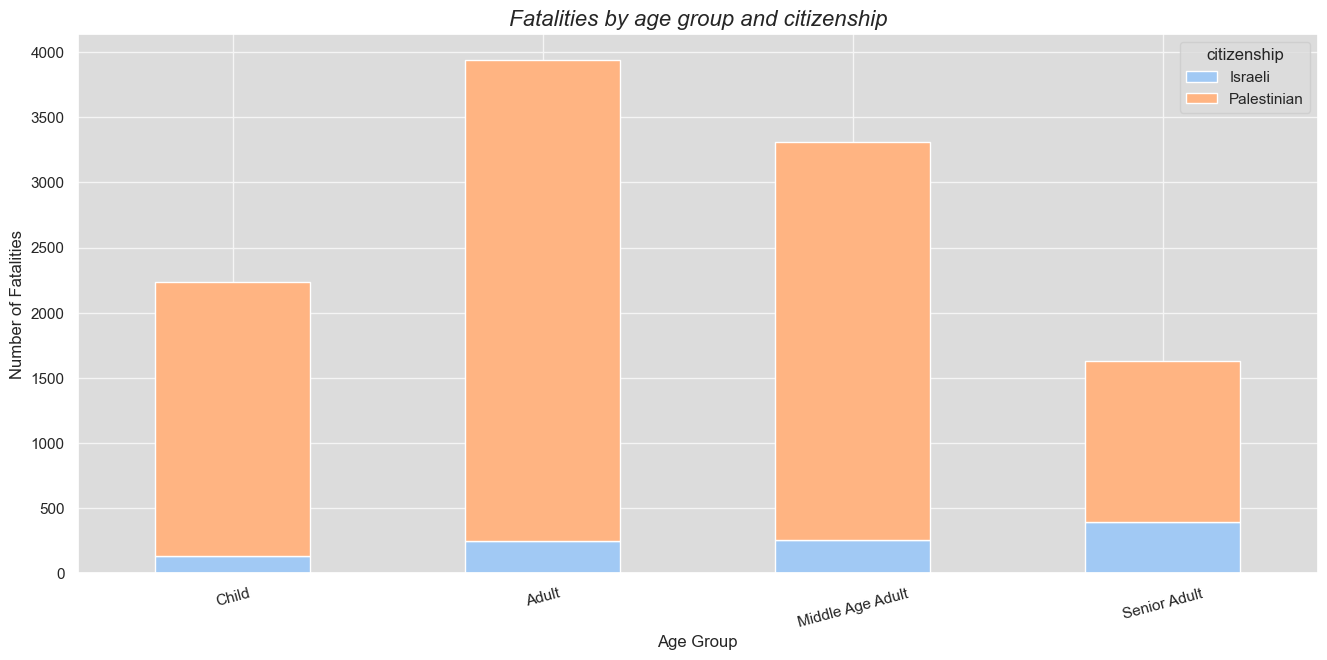

In [44]:
# Stacked plots
df = pd.DataFrame(data) # Copy data in df to avoid manipulation in real data
# Age bins and groups distribution
age_bins = [0, 18, 25, 40, 120]
age_labels = ['Child', 'Adult', "Middle Age Adult", 'Senior Adult']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Stack bar plot between age group and citizenship
pivot_df = df.pivot_table(index='age_group'
                          , columns='citizenship', values='age', aggfunc='count')
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Fatalities by age group and citizenship',fontsize=16,fontstyle='italic')
plt.xticks(rotation=15)
plt.show()

If we perform comparison based on age group and citizenship, we can see that palestinian adults fatalities are maximum overall.<br>
* Palestine fatalities are maximum in adult age category while minimum in senior adult age category.<br>
* Israel fatalities are maximum in senior adult while minimum in child age category.<br>
* We can compare that palestinian children killed are much higher that israel senior adult killing which is huge proof of israel brutality on palestinian people.<br>
> The maximum killing here are palestinian adults which shows israel plan to wipe out the whole generation of palestinian people to decrease their moral and destroy their future.

<b>Analysis By Gender and Citizenship</b>

<Figure size 1000x1000 with 0 Axes>

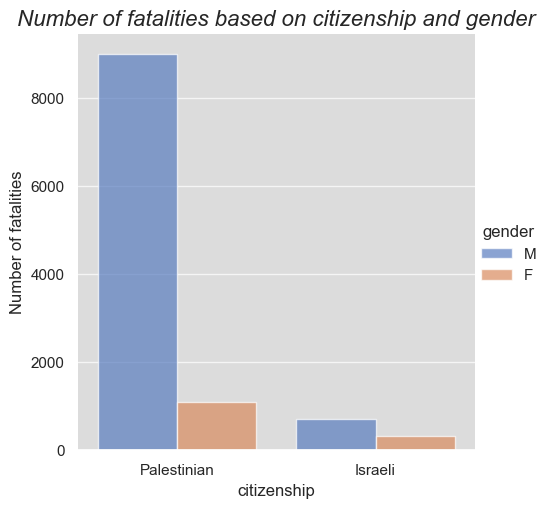

<Figure size 1000x1000 with 0 Axes>

In [45]:
sns.catplot(
    data=data, kind="count",
    x="citizenship", hue="gender",
    palette="muted", alpha=.7, height=5
).despine(left=True)
plt.ylabel("Number of fatalities", fontsize=12)
plt.title("Number of fatalities based on citizenship and gender", fontsize=16, fontstyle='italic')
plt.figure(figsize=(10,10))

This comparison shows fatalities based on citizenship and gender.
* This shows that maximum fatilities are for palestinian males and minumun for israeli females.<br>
* It shows a big difference between israel and palestine fatalities.<br>
> Here we can get that even palestinian female fatalities are greater that the israel males fatalities.<br>
Is it even greater than israel whole fatalities? Let's check.

In [67]:
data.groupby(['citizenship', 'gender']).size()

citizenship  gender
Israeli      F          331
             M          698
Palestinian  F         1091
             M         8994
dtype: int64

> Here we can see that all israel fatalities are 1029 while only palestinian females fatalities are 1091 which is greate than israel all fatalities.<br>
This shows the brutal attack of israel on palestinian people.

# Q-3

##### Visualize the distribution of fatalities and identify areas that have experienced higher levels of violence.

<b>Fatalities based on citizenship</b>

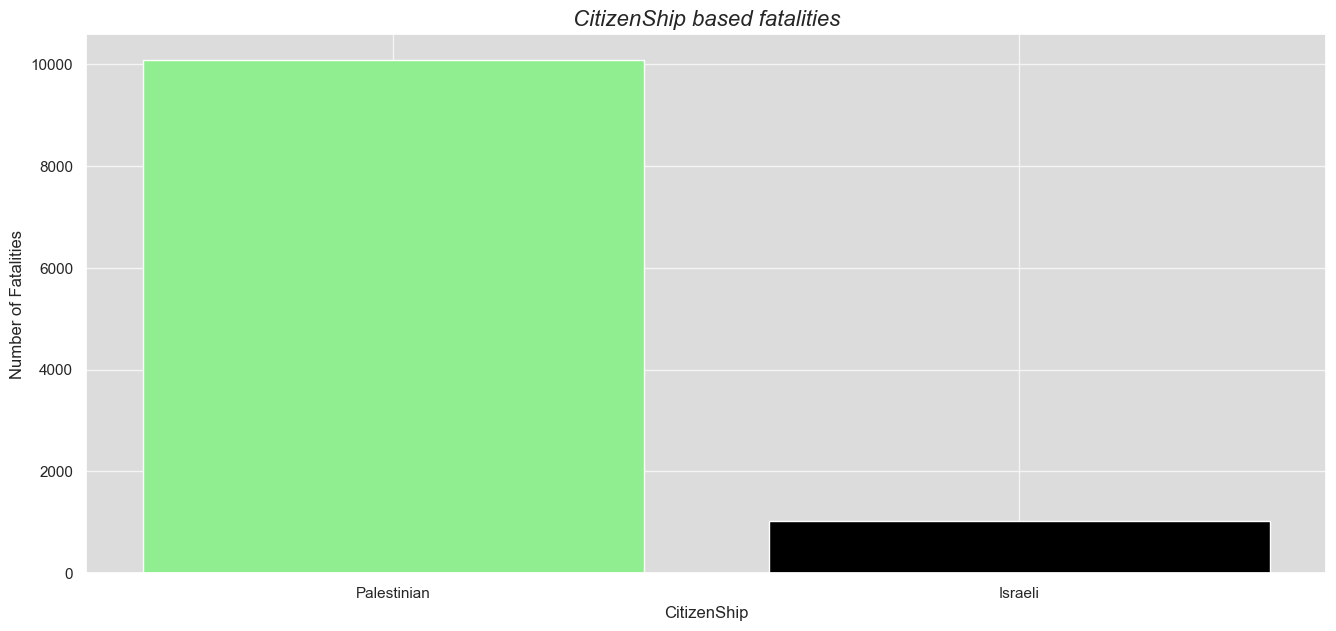

In [50]:
# Bar plot based on citizenship value counts
citizenship_value_counts = data['citizenship'].value_counts()
plt.figure(figsize=(16, 7))
plt.bar(citizenship_value_counts.index, citizenship_value_counts.head(5).values, color=['lightgreen', 'black', 'yellow', 'red'])
plt.xlabel('CitizenShip',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('CitizenShip based fatalities',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

This graph shows that palestine fatalities are higher.

<b>Region based fatalities</b>

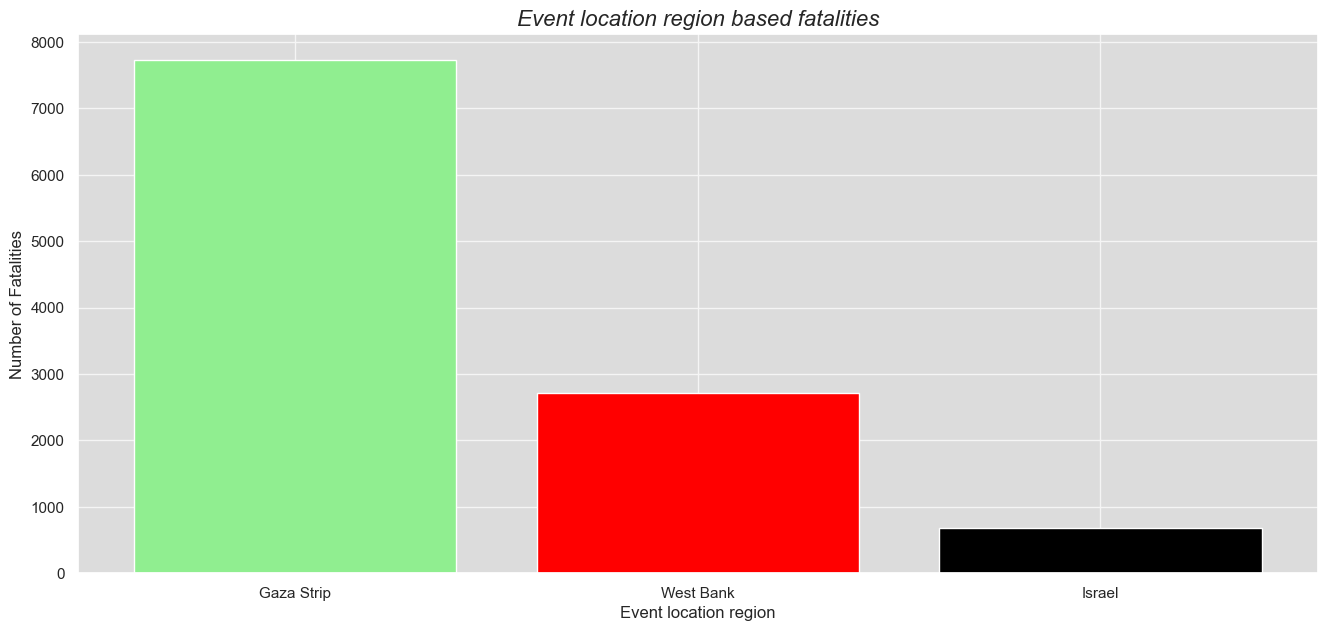

In [52]:
# Bar plot based on event location region value counts
event_location_region_value_counts = data['event_location_region'].value_counts()
plt.figure(figsize=(16, 7))
plt.bar(event_location_region_value_counts.index, event_location_region_value_counts.head(5).values, color=['lightgreen', 'red', 'black'])
plt.xlabel('Event location region',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Event location region based fatalities',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

This graph shows that Gaza strip region is experiencing higher level of violence while West Bank is on second for violence and israel is facing minimum violence.

<b>District based fatalities</b>

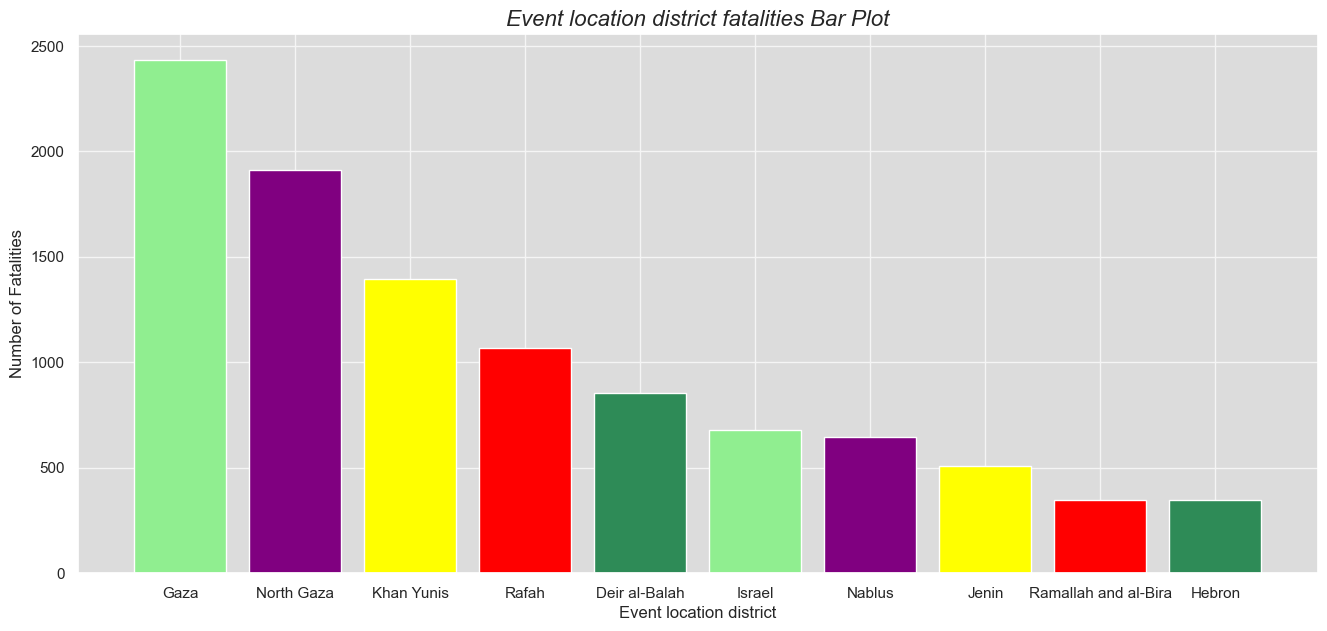

In [53]:
# Bar plot based on top 10 event location district value counts
event_location_district_value_counts = data['event_location_district'].value_counts()
plt.figure(figsize=(16, 7))
plt.bar(event_location_district_value_counts.head(10).index, event_location_district_value_counts.head(10).values,
        color=['lightgreen', 'purple', 'yellow', 'red', 'seagreen'])
plt.xlabel('Event location district',fontsize=12)
plt.ylabel('Number of Fatalities',fontsize=12)
plt.title('Event location district fatalities Bar Plot',fontsize=16,fontstyle='italic')
plt.xticks(rotation=0)
plt.show()

This graph shows that Gaza district is facing higher level of violence.
* North Gaza, Khan Yunis, Rafah and Deir-al-Balah is after this while Israel is on sixth number in facing violence.
* After them Nablus, Jenin, Ramallah and al-bira, and Herbon are facing violence.
* Some other district also facing violence but violence intensity in these are less.
<br><br>District showing here are facing higher level of violence.<br>
This will be more clear in below graph.

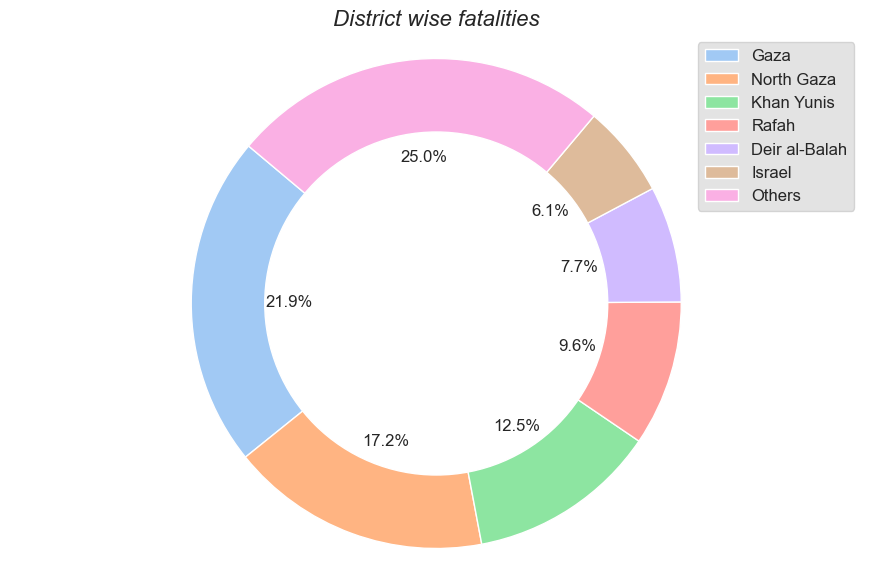

In [98]:
top_10_district = event_location_district_value_counts[:6]
others_count = event_location_district_value_counts[6:].sum()
others_series = pd.Series({'Others': others_count})
updated_district_counts = pd.concat([top_10_district, others_series])
plt.figure(figsize=(11, 7))
wedges, texts, autotexts = plt.pie(updated_district_counts, labels=updated_district_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('District wise fatalities', fontsize=16, fontstyle='italic')
for text in texts:
    text.set_visible(False)
plt.legend(wedges, updated_district_counts.index, loc='upper right', fontsize='medium')
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()


As the graph showing Gaza is facing higher level of violence with 21.9% while israel is facing 6.1% violence.<br>
All district (other that showing in graph) combinally facing 25% violence.

# Wordcloud of the notes in data

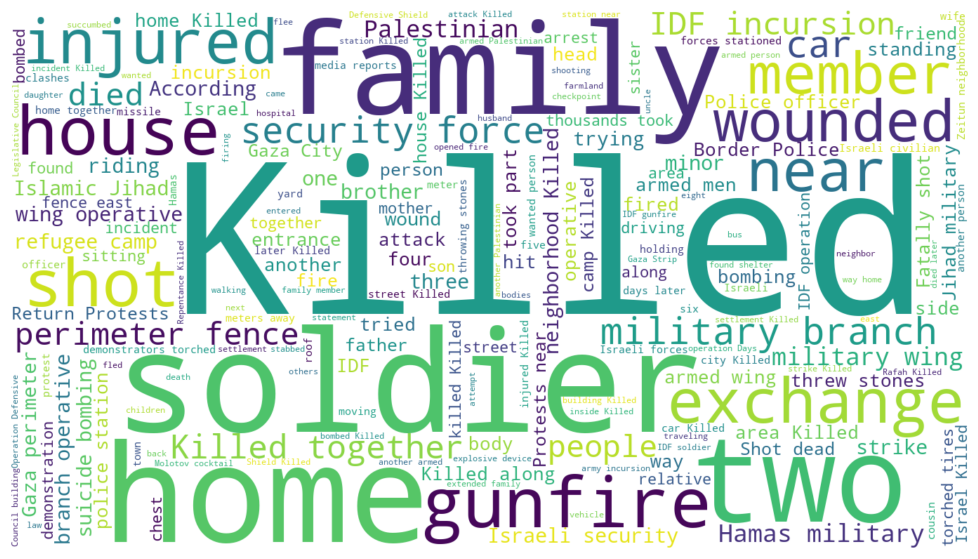

In [100]:
# !pip install wordcloud
from wordcloud import WordCloud
text = ''.join(df['notes'].dropna())
wordcloud = WordCloud(background_color='white', width=1366, height=768).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As we're seeing wordcloud of the notes given on fatalities, we can easily observe that
* Most used word is Killed.
* After this, We can see some other famous words like soldier, shot, gunfire, Killed together, Exchange, friend, died, injured, home, house, military branch, Hamas military, Israel security, etc..
> This all shows huge words related to death and attacks. This all showing tense situation in the area of palestine and israel.